![Image of Yaktocat](https://www.xoxly.com/wp-content/uploads/2017/12/ogp.png)

## Mercari Price Suggestion Challenge
**Can you automatically suggest product prices to online sellers?**

**It can be hard to know how much something’s really worth**. Small details can mean big differences in pricing. For example, one of these sweaters costs 335usd and other one is 10usd. Can you guess which one’s which?

![Image of Yaktocat](https://storage.googleapis.com/kaggle-media/competitions/mercari/mercari_comparison.png)

**Product pricing gets even harder at scale**, considering just how many products are sold online. Clothing has strong seasonal pricing trends and is heavily influenced by brand names, while electronics have fluctuating prices based on product specs.

***Mercari, Japan’s biggest community-powered shopping app, knows this problem deeply***. They’d like to offer pricing suggestions to sellers, but this is tough because their sellers are enabled to put just about anything, or any bundle of things, on Mercari's marketplace.

In this competition, Mercari’s challenging you to **build an algorithm that automatically suggests the right product prices**. You’ll be provided user-inputted text descriptions of their products, including details like product category name, brand name, and item condition.

## Parameters given by Mercari to predict:

1. **Id** : Id of the product
2. **Name**: title of the product
3. **Condition**: condition of the product (0: bad, 5: new)
4. **Category_name**: Category which product belongs to
5. **Brand_name**: Brand which product belongs to
6. **Shipping**: who (buyer/seller) will buy shipping charges
7. **Description**: product description in more detail

## Target 
**Price**: Value of that product

## General Report

**What's the objective behind this challenge**: To create an optimized algorithm which can recommend prices to the users 

**What will be the outcome of the objective** : If the algorithm is good enough, then users will use the application more often which will eventually increase the sales.

**How to classify the problem**: Since we need to predict the prices, so its a Supervised Machine Learning, we'll use different ML algorithms to get the good result.

**How to measure the performance of the problem**: In creation of supervised ML model, generally we use RMSE (Root mean square error) but in this case we'll use RMSLE (Root mean square logarithmic error).

**What other things can affect the model**: Parameters like Geographical location, time, economic conditions can help in predicting the prices more better.

## Importing Libraries

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_data = pd.read_csv('data/train.tsv', delimiter= '\t')
train_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.000,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.000,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.000,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.000,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.000,0,Complete with certificate of authenticity


In [20]:
test_data_1 = pd.read_csv('data/test.tsv', delimiter= '\t')
test_data_1.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


Here, in both datasets we can see some **NaN values** which we need to remove

## Exploratory Data Analysis

### Price Distribution

By Analysing Price, we found:

* **Mean**: 26 USD
* **Median**: 17 USD
* **Std**: 38 USD
* **Max price**: 2009 USD
* **Min price**: 0 USD (doesn't make any sense)
* Price distribution is **right skewed** due to this we can see the difference between Mean and Standard deviation.
* Buyer will pay more if he pays for shipping.

In [21]:
train_data.price.describe()

count   1482535.000
mean         26.738
std          38.586
min           0.000
25%          10.000
50%          17.000
75%          29.000
max        2009.000
Name: price, dtype: float64

In [22]:
def plot_histogram(column, range_size, color, bins, title, xlabel, ylabel):
    plt.subplots(figsize=(15,5))
    plt.hist(train_data[(train_data[column] > range_size[0]) & (train_data[column] < range_size[1])]['price'], bins=bins, 
             color= color, edgecolor = 'black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

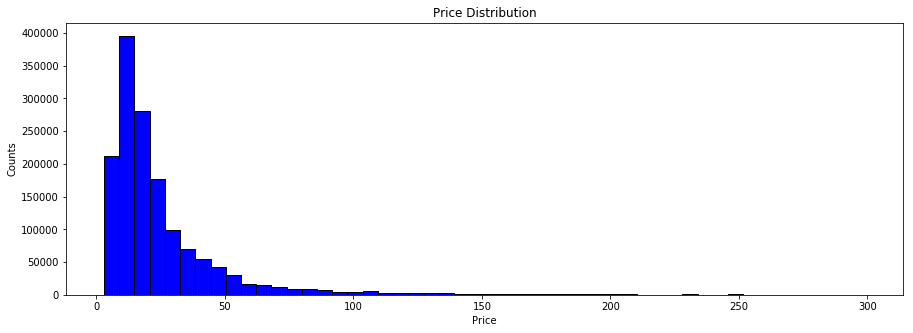

In [23]:
plot_histogram('price', (0,300), 'blue', 50, 'Price Distribution', 'Price', 'Counts')

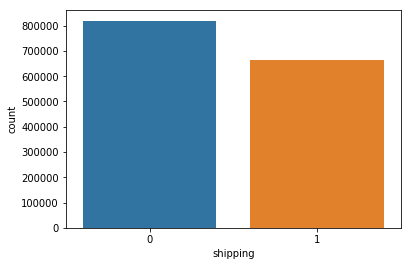

In [24]:
ax = sns.countplot(x="shipping", data=train_data)

By seeing the countplot of shipping we can say proporation of **Seller paying for shipping is little higher**.

In [25]:
def plot_shipping():
    plt.subplots(figsize=(15,5))
    plt.hist(train_data[train_data['shipping'] ==1]['price'], bins=50, color= 'green', edgecolor = 'black', 
             range=[0,300], normed=True, label = 'seller is paying for shipping', alpha = 0.5)
    plt.hist(train_data[train_data['shipping'] ==0]['price'], bins=50, color= 'orange', edgecolor = 'black', 
             range=[0,300], normed=True, label = 'buyer is paying for shipping', alpha = 0.5)
    plt.title('Price Distribution With/Without Shipping', fontsize=15)
    plt.xlabel('Price')
    plt.ylabel('Normalized Samples')
    plt.legend()

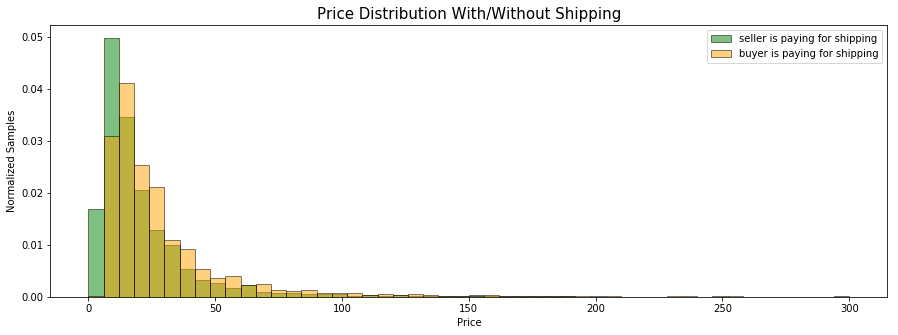

In [26]:
plot_shipping()

In [30]:
train_data[train_data['shipping'] == 1]['price'].median()

14.0

In [31]:
train_data[train_data['shipping'] == 0]['price'].median()

20.0

As we imagined that if **buyer pays for shipping then mean price will be high**

### Brand Analysis

In [32]:
train_data['brand_name'].value_counts().reset_index()

,index,brand_name
0,PINK,54088
1,Nike,54043
2,Victoria's Secret,48036
3,LuLaRoe,31024
4,Apple,17322
5,FOREVER 21,15186
6,Nintendo,15007
7,Lululemon,14558
8,Michael Kors,13928
9,American Eagle,13254


Since we have close to **5000 brand names** , lets checkout **top 50 brands**

[Text(0, 0.5, 'brand_name'), Text(0.5, 0, 'count')]

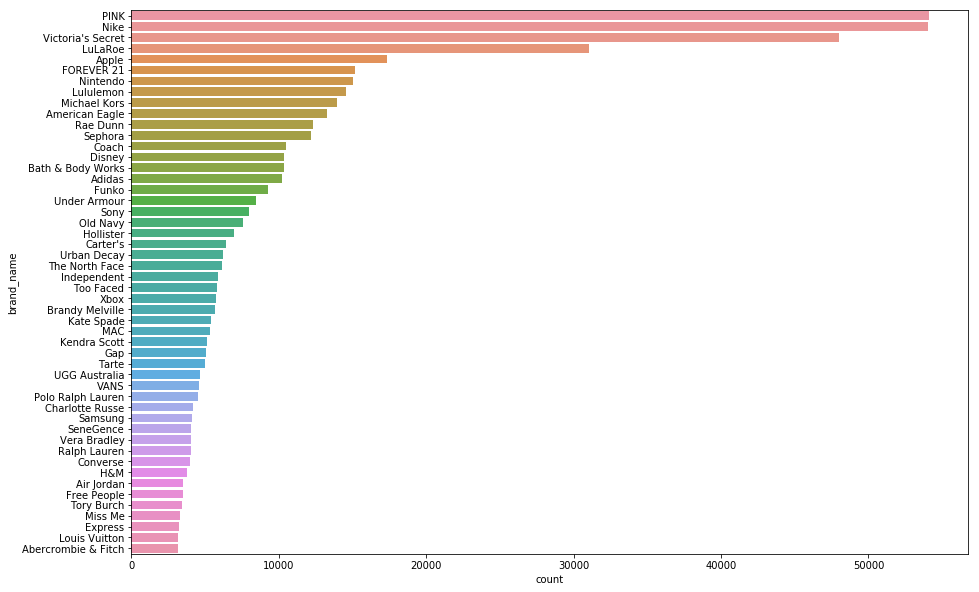

In [37]:
plt.subplots(figsize=(15,10))
ax = sns.barplot(x = 'brand_name', y = 'index', data = train_data['brand_name'].value_counts().reset_index()[:50])
ax.set(xlabel='count', ylabel='brand_name')

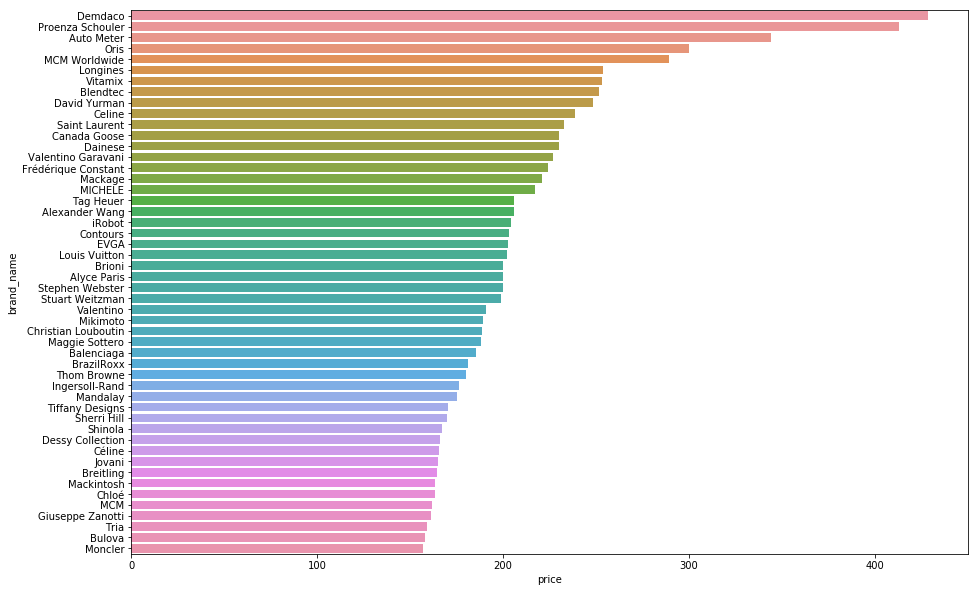

In [38]:
brand_mean = train_data.groupby(['brand_name'])['price'].mean()
plt.subplots(figsize=(15,10))
sns.barplot(x = 'price', y = 'brand_name', data = brand_mean.reset_index().sort_values(by = 'price', 
                                                                                       ascending = False)[:50])

### Category Analysis

If we see our data then we'll find that in our category_name **we have three categories segregated by '/'** so lets split them into **three categories named 'main_category', 'sub_category', 'product_category'**.

In [39]:
def create_sub_categories(dataframe):
    dataframe['temp'] = dataframe['category_name'].apply(lambda x: str(x).split('/'))
    main_category = []
    sub_category = []
    sub_category2 = []
    for i in dataframe['temp'].values:
        main_category.append(i[0])
        try:
            sub_category.append(i[1])
        except:
            sub_category.append(np.nan)
        try:
            sub_category2.append(i[2])
        except:
            sub_category2.append(np.nan)
    dataframe['main_category'] = main_category
    dataframe['sub_category'] =sub_category
    dataframe['sub_category2']= sub_category2
    dataframe = dataframe.drop(columns='temp')
    return dataframe

In [40]:
category_df = train_data[['category_name', 'price']]
category_df = create_sub_categories(category_df)
category_df.head()

,category_name,price,main_category,sub_category,sub_category2
0,Men/Tops/T-shirts,10.000,Men,Tops,T-shirts
1,Electronics/Computers & Tablets/Components & P...,52.000,Electronics,Computers & Tablets,Components & Parts
2,Women/Tops & Blouses/Blouse,10.000,Women,Tops & Blouses,Blouse
3,Home/Home Décor/Home Décor Accents,35.000,Home,Home Décor,Home Décor Accents
4,Women/Jewelry/Necklaces,44.000,Women,Jewelry,Necklaces


#### Major contributer main category in the distribution 

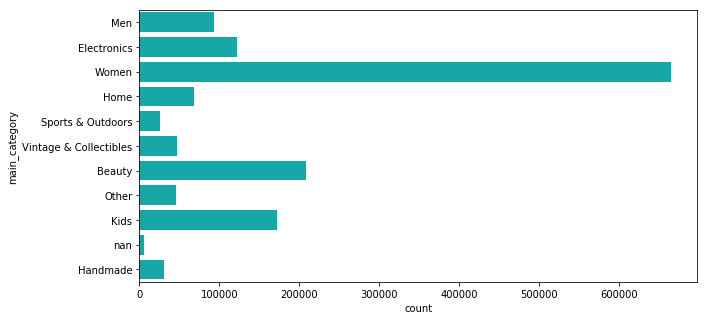

In [41]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y="main_category", data=category_df, color="c")

#### Top 25 Major contributer at sub_category in the distribution¶

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

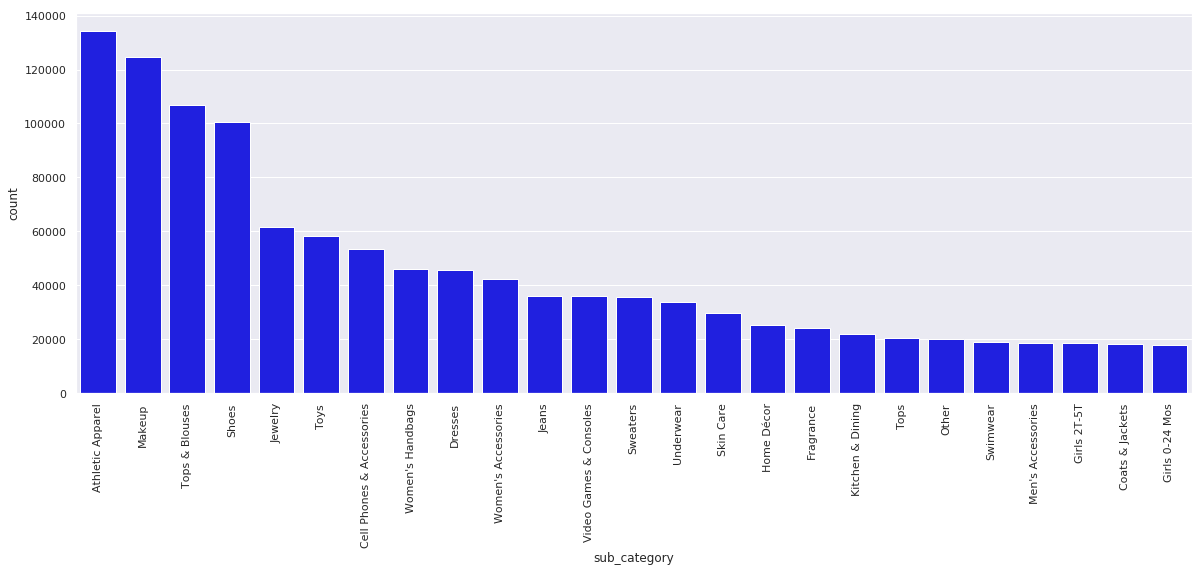

In [53]:
f, ax = plt.subplots(figsize=(20, 7))
sns.set(style="darkgrid")
sns.countplot(x="sub_category", data=category_df, color="blue", 
              order=category_df.sub_category.value_counts().iloc[:25].index)
plt.xticks(rotation=90)

#### Top 25 Major contributer at sub_category2 in the distribution¶

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

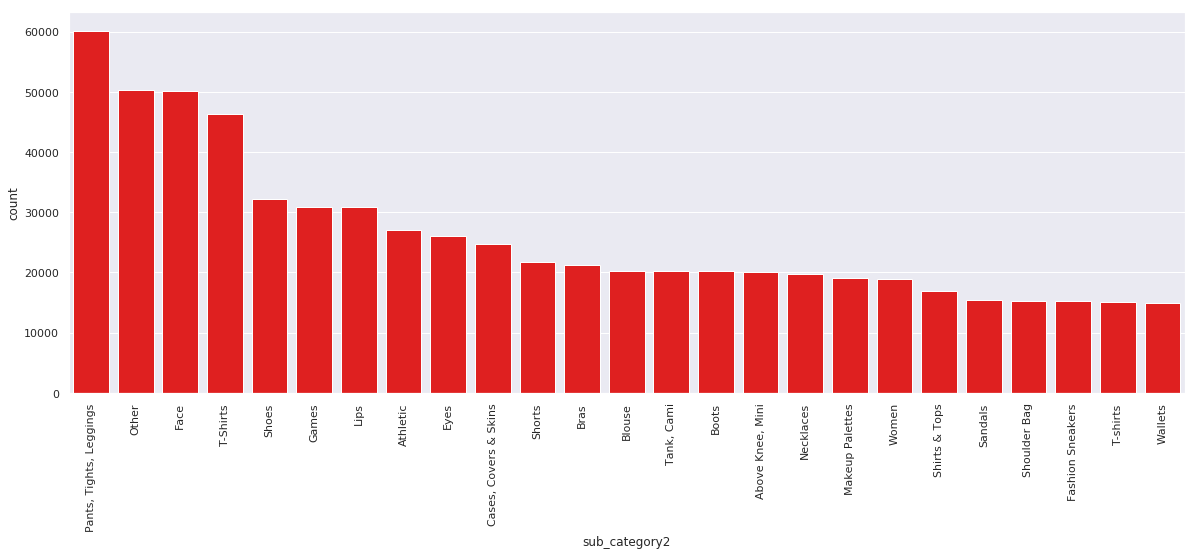

In [54]:
f, ax = plt.subplots(figsize=(20, 7))
sns.countplot(x="sub_category2", data=category_df, color="red", 
              order=category_df.sub_category2.value_counts().iloc[:25].index)
plt.xticks(rotation=90)

### Item Discription Analysis
We need to know how item discription depends on the price, if the length of discription starts increasing then price starts falling down or start increasing

**Result:** We determined that Price of an item will get stagnant as length of item_discription increases. So it means price depends on the content of the description.

In [55]:
item_descrip_analysis = train_data[['item_description', 'price']]
item_descrip_analysis['length'] = item_descrip_analysis['item_description'].apply(lambda x: len(str(x)))

In [56]:
item_descrip_analysis.head()

,item_description,price,length
0,No description yet,10.000,18
1,This keyboard is in great condition and works ...,52.000,188
2,Adorable top with a hint of lace and a key hol...,10.000,124
3,New with tags. Leather horses. Retail for [rm]...,35.000,173
4,Complete with certificate of authenticity,44.000,41


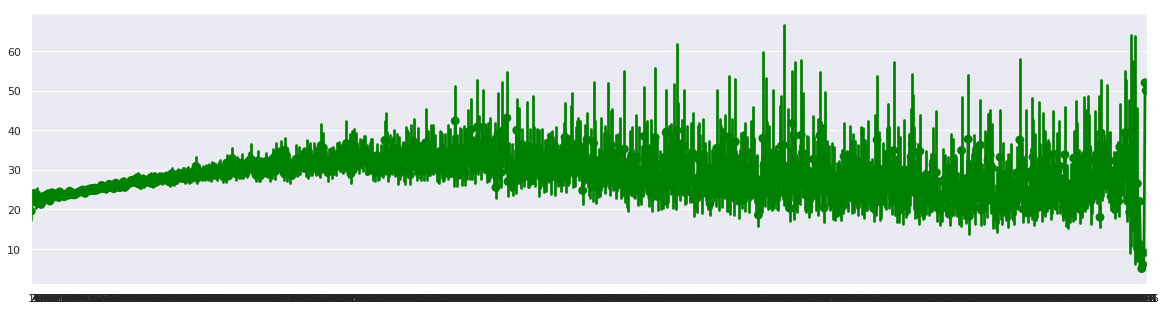

In [61]:
f, ax = plt.subplots(figsize=(20, 5))
sns.pointplot(x = item_descrip_analysis['length'].values, y = item_descrip_analysis['price'].values, 
              color='green')

# Natural Language Processing for item_description

Here in NLP we are using nltk to do the following:
1. Removing stop words
2. Removing puntuations
3. Removing stem words
4. Converting the description to lower letters
5. Removing all the digits

### Removing all the puntuations and special characters from the description.

In [66]:
import string
def removal_puntuations(x):
    x =  ' '.join(word.strip(string.punctuation) for word in x.split())
    return x

### Removing stop words (is, are, the) which are unrelevant for our analysis

In [67]:
from nltk.corpus import stopwords
try:
    stop = stopwords.words('english')
except:
    nltk.download('stopwords')
    stop = stopwords.words('english')

def removal_stop_words(x):
    x =  ' '.join([word for word in x.split() if word not in (stop)])
    return x

### Removing all the digits 

In [68]:
digits = '0123456789'
def removal_digits(x):
    x =  ''.join([i for i in x if not i.isdigit()])
    return x

### Convert the description to lower letters

In [69]:
def lowercase(x):
    return x.lower()

### Removing stem words (converting all the words into their root form)

In [70]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')
  
ps = PorterStemmer()
def removal_stem_words(x):
    x = ' '.join(ps.stem(word) for word in x.split())
    return x

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Preprocessing the Data

To do so we need to combine both test and train data and run all the feature scaling functions

In [71]:
new_combined = train_data.append(test_data_1)
new_combined.head()

,brand_name,category_name,item_condition_id,item_description,name,price,shipping,test_id,train_id
0,NaN,Men/Tops/T-shirts,3,No description yet,MLB Cincinnati Reds T Shirt Size XL,10.000,1,nan,0.000
1,Razer,Electronics/Computers & Tablets/Components & P...,3,This keyboard is in great condition and works ...,Razer BlackWidow Chroma Keyboard,52.000,0,nan,1.000
2,Target,Women/Tops & Blouses/Blouse,1,Adorable top with a hint of lace and a key hol...,AVA-VIV Blouse,10.000,1,nan,2.000
3,NaN,Home/Home Décor/Home Décor Accents,1,New with tags. Leather horses. Retail for [rm]...,Leather Horse Statues,35.000,1,nan,3.000
4,NaN,Women/Jewelry/Necklaces,1,Complete with certificate of authenticity,24K GOLD plated rose,44.000,0,nan,4.000


### Size of train and test data

In [72]:
print('train_data:',train_data.shape[0])
print('test_data:',test_data_1.shape[0])
print('total_combined_data:', new_combined.shape[0])

train_data: 1482535
test_data: 693359
total_combined_data: 2175894


In [73]:
new_combined['item_description'] = new_combined['item_description'].astype(str)
new_combined['name'] = new_combined['name'].astype(str)

new_combined['item_description'] = new_combined['item_description'].apply(removal_puntuations)
new_combined['item_description'] = new_combined['item_description'].apply(removal_digits)
new_combined['item_description'] = new_combined['item_description'].apply(removal_stop_words)
new_combined['item_description'] = new_combined['item_description'].apply(lowercase)
new_combined['item_description'] = new_combined['item_description'].apply(removal_stem_words)

new_combined['name'] = new_combined['name'].apply(removal_puntuations)
new_combined['name'] = new_combined['name'].apply(removal_digits)
new_combined['name'] = new_combined['name'].apply(removal_stop_words)
new_combined['name'] = new_combined['name'].apply(lowercase)
new_combined['name'] = new_combined['name'].apply(removal_stem_words)

In [74]:
new_combined.head()

,brand_name,category_name,item_condition_id,item_description,name,price,shipping,test_id,train_id
0,NaN,Men/Tops/T-shirts,3,no descript yet,mlb cincinnati red t shirt size xl,10.000,1,nan,0.000
1,Razer,Electronics/Computers & Tablets/Components & P...,3,thi keyboard great condit work like came box a...,razer blackwidow chroma keyboard,52.000,0,nan,1.000
2,Target,Women/Tops & Blouses/Blouse,1,ador top hint lace key hole back the pale pink...,ava-viv blous,10.000,1,nan,2.000
3,NaN,Home/Home Décor/Home Décor Accents,1,new tag leather hors retail rm stand foot high...,leather hors statu,35.000,1,nan,3.000
4,NaN,Women/Jewelry/Necklaces,1,complet certif authent,k gold plate rose,44.000,0,nan,4.000


In [75]:
new_combined = create_sub_categories(new_combined)

In [76]:
new_combined.to_csv('data/final_dataset.csv', index=False) #saving the data to save future compute

In [77]:
new_combined.head()

,brand_name,category_name,item_condition_id,item_description,name,price,shipping,test_id,train_id,main_category,sub_category,sub_category2
0,NaN,Men/Tops/T-shirts,3,no descript yet,mlb cincinnati red t shirt size xl,10.000,1,nan,0.000,Men,Tops,T-shirts
1,Razer,Electronics/Computers & Tablets/Components & P...,3,thi keyboard great condit work like came box a...,razer blackwidow chroma keyboard,52.000,0,nan,1.000,Electronics,Computers & Tablets,Components & Parts
2,Target,Women/Tops & Blouses/Blouse,1,ador top hint lace key hole back the pale pink...,ava-viv blous,10.000,1,nan,2.000,Women,Tops & Blouses,Blouse
3,NaN,Home/Home Décor/Home Décor Accents,1,new tag leather hors retail rm stand foot high...,leather hors statu,35.000,1,nan,3.000,Home,Home Décor,Home Décor Accents
4,NaN,Women/Jewelry/Necklaces,1,complet certif authent,k gold plate rose,44.000,0,nan,4.000,Women,Jewelry,Necklaces


### We still found that brand_name, and some category have nan values, so need to replace them with some other characters to have the general model

In [78]:
new_combined.isna().sum()

brand_name            928207
category_name           9385
item_condition_id          0
item_description           0
name                       0
price                 693359
shipping                   0
test_id              1482535
train_id              693359
main_category              0
sub_category            9385
sub_category2           9385
dtype: int64

In [79]:
missing_values = {'brand_name': 'missing', 'sub_category':'None', 'sub_category2':'None'}
new_combined = new_combined.fillna(value=missing_values)
new_combined.head()

,brand_name,category_name,item_condition_id,item_description,name,price,shipping,test_id,train_id,main_category,sub_category,sub_category2
0,missing,Men/Tops/T-shirts,3,no descript yet,mlb cincinnati red t shirt size xl,10.000,1,nan,0.000,Men,Tops,T-shirts
1,Razer,Electronics/Computers & Tablets/Components & P...,3,thi keyboard great condit work like came box a...,razer blackwidow chroma keyboard,52.000,0,nan,1.000,Electronics,Computers & Tablets,Components & Parts
2,Target,Women/Tops & Blouses/Blouse,1,ador top hint lace key hole back the pale pink...,ava-viv blous,10.000,1,nan,2.000,Women,Tops & Blouses,Blouse
3,missing,Home/Home Décor/Home Décor Accents,1,new tag leather hors retail rm stand foot high...,leather hors statu,35.000,1,nan,3.000,Home,Home Décor,Home Décor Accents
4,missing,Women/Jewelry/Necklaces,1,complet certif authent,k gold plate rose,44.000,0,nan,4.000,Women,Jewelry,Necklaces


In [80]:
new_combined.isna().sum()

brand_name                 0
category_name           9385
item_condition_id          0
item_description           0
name                       0
price                 693359
shipping                   0
test_id              1482535
train_id              693359
main_category              0
sub_category               0
sub_category2              0
dtype: int64

## Converting all the categorical or string based columns into sparse matrix to train the model.

To do so we are using diffrent types of encoder:
1. CountVectorizer: will apply it on 'name' column which will give sparse matrix of the occurence of all the words.
2. TfidfVectorizer: will apply it on 'item_description' column which will also give the sparse matrix of the occurence but in normalized form
3. LabelBinarizer: will apply it on 'brand_name' column as its a categorical variable so it will create a 2D matrix with shape (number_of_rows, number_of_unique_brands)

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df = 10)
name_mat = cv.fit_transform(new_combined['name'])

In [82]:
cv = CountVectorizer()
main_mat = cv.fit_transform(new_combined['main_category'])

In [83]:
cv = CountVectorizer()
sub_mat = cv.fit_transform(new_combined['sub_category'])

In [84]:
cv = CountVectorizer()
sub2_mat = cv.fit_transform(new_combined['sub_category2'])

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 60000, ngram_range = (1,3), stop_words = 'english')
descrip_mat = tfidf.fit_transform(new_combined['item_description'])

In [86]:
from sklearn.preprocessing import LabelBinarizer
onehotencoder = LabelBinarizer(sparse_output=True)
brand_mat = onehotencoder.fit_transform(new_combined['brand_name'])

In [87]:
item_shipping_mat = pd.get_dummies(new_combined[['item_condition_id', 'shipping']], sparse = True).values

### Now we have all the matrix, we need to combine them to make the proper dataset to train/test the model

- Since item_shipping_mat is numpy array, we need to convert it to csr_matrix
- will use hstack to combine all the sparse matrix into one

In [88]:
from scipy import sparse
item_shipping_mat_csr = sparse.csr_matrix(item_shipping_mat)

In [89]:
type(item_shipping_mat_csr)

scipy.sparse.csr.csr_matrix

In [90]:
train_test_dataset = sparse.hstack([brand_mat, main_mat, sub_mat, sub2_mat, name_mat, descrip_mat, 
                                    item_shipping_mat]).tocsr()

In [91]:
train_test_dataset.shape

(2175894, 151721)

### Here we can see that number of features from 8 has been increased to 151721

In [92]:
import scipy.sparse
scipy.sparse.save_npz('data/sparse_matrix.npz', train_test_dataset)

In [2]:
import scipy.sparse
train_test_dataset = scipy.sparse.load_npz('data/sparse_matrix.npz')

In [93]:
train_test_dataset.shape

(2175894, 151721)

# Machine Learning

## Splitting into train and test datasets

In [7]:
xtrain = train_test_dataset[:1482535]
ytrain = train_data['price'].values
xtest = train_test_dataset[1482535:]

In [119]:
xtrain.shape, ytrain.shape

((1482535, 151721), (1482535,))

In [120]:
ytrain

array([2.30258509, 3.95124372, 2.30258509, ..., 2.48490665, 3.80666249,
       3.09104245])

## Exploring different Machine Learning Algorithm and using cross_validation to calculate the highest accuracy

## Ridge Regression

![Alt text](5.png)
![Alt text](6.png)
![Alt text](7.png)
![Alt text](8.png)

In [142]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import math
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size = 0.1)
now = time.time()
model_ridge = Ridge(solver = 'sag', fit_intercept = False)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
rms = math.sqrt(mean_squared_error(y_test, y_pred_ridge))
print('Loss:',rms)
print('Time Taken:',time.time() - now)

Loss: 30.298763749438383
Time Taken: 110.44774222373962


In [143]:
y_test[:50]

array([315.,  36.,  24.,  16.,  23.,  12.,  18.,  15.,  23.,  14., 143.,
        34.,   7.,  27.,  26.,  13.,   6.,  51.,  18.,  15.,  25.,  30.,
        17.,  10.,  21.,  30.,  10.,  19.,  17.,  16.,  16.,  31.,  24.,
        46.,   3.,   5., 100.,   7.,  20.,  35.,  34.,  35.,  50.,   8.,
        18.,   8.,  15.,  20.,  16.,  70.])

In [144]:
y_pred_ridge[:50]

array([232.6587539 ,  31.0714124 ,  29.75845072,  19.4865851 ,
        26.3316417 ,   7.82036554,  11.62702811,  17.56351441,
        24.89793811,  37.45927037,  88.98717705,  17.84674427,
        20.27993499,  51.60605937,  25.48078299,  22.58179237,
         6.61034001,  35.32447831,  20.45735885,  59.8191297 ,
        21.25931733,  40.5468098 ,  22.2522782 ,  -0.39874764,
        48.18855254,  21.51743743,  23.38997729,  26.25282817,
        27.88447366,  15.53454433,  32.82200916,  22.99390969,
        30.79071527,  58.81903172,   5.16667625,  17.61888814,
       175.34692522,   5.35996102,  26.88352358,  30.95118787,
        38.06725967,  30.73621634,  62.89770776,   1.16534781,
        12.04954617,  16.15281855,  18.67367234,  36.54183008,
        28.97822776,  67.22669586])

## LightGBM

**What is Light GBM?**

Light GBM is a gradient boosting framework that uses tree based learning algorithm.

**How it differs from other tree based algorithm?**

Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

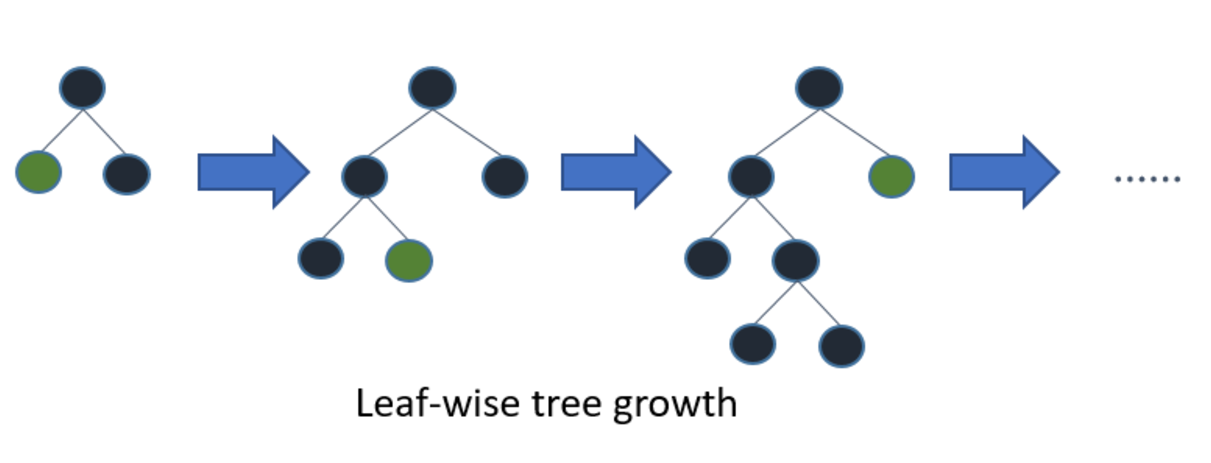

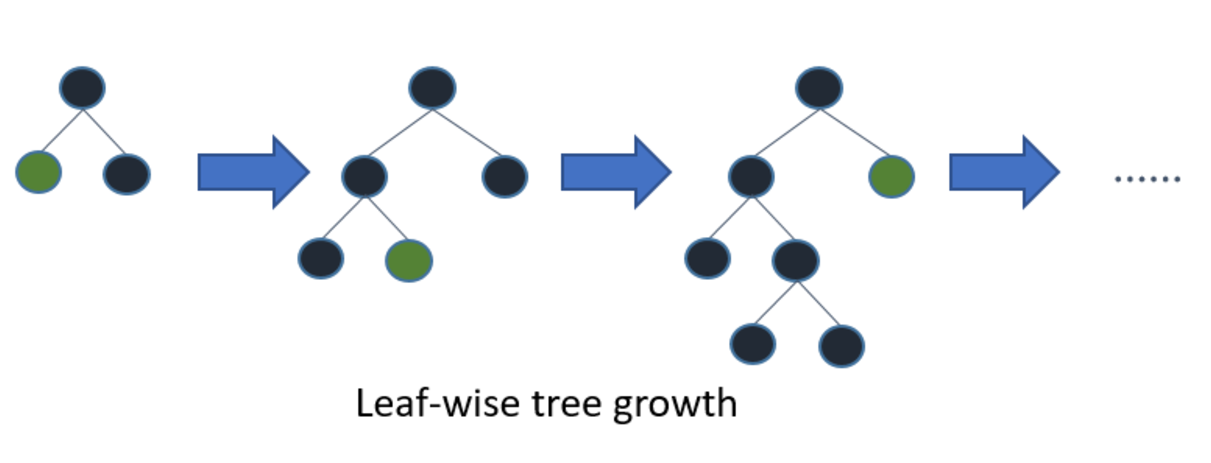

**Can we use Light GBM everywhere?**

No, it is not advisable to use LGBM on small datasets. Light GBM is sensitive to overfitting and can easily overfit small data. Their is no threshold on the number of rows but my experience suggests me to use it only for data with 10,000+ rows.

In [153]:
from sklearn.model_selection import train_test_split
import math
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size = 0.1)
y_train_log = np.log1p(y_train)
d_train = lgb.Dataset(X_train, label=y_train_log)
params = {}
#params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'
now = time.time()
clf = lgb.train(params, d_train, 100, init_model=clf, learning_rates=lambda iter: 0.03 * (0.99 ** iter))
y_pred_lgbm = clf.predict(X_test)
y_pred_lgbm = np.expm1(y_pred_lgbm)
rms = math.sqrt(mean_squared_error(y_test, y_pred_lgbm))
print('Loss:',rms)
print('Time Taken:',time.time() - now)

Loss: 31.51026504298643
Time Taken: 58.74648308753967


In [154]:
y_test[50:100]

array([14.,  6., 10., 35., 12.,  5., 99., 72., 10., 19., 17., 10., 10.,
       18., 10., 31., 99.,  8., 14., 32., 11., 55., 15.,  9., 44., 45.,
       10., 66.,  8.,  8., 13., 81., 30., 66., 35., 10., 19.,  9., 17.,
       24., 23.,  7., 26.,  6., 49.,  7., 36., 13., 10., 46.])

In [155]:
y_pred_lgbm[50:100]

array([17.93182019, 10.73253913, 14.27699573, 26.62021822, 16.08758775,
        7.92255667, 76.85706483, 10.49487018, 23.24514625, 38.13832393,
       16.31088539, 12.40411681, 18.29843816, 28.37307876, 15.8483662 ,
       17.23817511, 29.4953987 ,  9.35596566, 14.37706721, 16.78085653,
       10.16628405, 53.51804507, 11.98203358, 13.1134069 , 16.72868105,
       31.16552991,  8.42827103, 25.41423044, 11.34092439,  9.78896938,
       16.75840428, 80.04214498, 18.10891713, 16.29362178, 19.86775722,
       10.9047366 , 16.23948458, 15.55872494,  9.18932246, 30.27915431,
       13.1313908 , 15.22269664, 19.04828059, 10.1331885 , 23.2083595 ,
       13.83273614, 42.73367535, 13.51425196, 14.7786328 , 26.13148768])

## Linear Regression

![Alt text](1.png)
![Alt text](2.png)
![Alt text](3.png)
![Alt text](4.png)

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size = 0.1)
now = time.time()
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
rms = math.sqrt(mean_squared_error(y_test, y_pred_ridge))
print('Loss:',rms)
print('Time Taken:',time.time() - now)

Loss: 46.30636796049923
Time Taken: 7176.847347021103


In [157]:
y_test[:50]

array([21.,  5., 12., 21., 14., 16., 10.,  9., 37., 31., 24., 32., 10.,
        6., 13., 10., 15., 31., 11., 36., 35.,  7., 44., 34., 31., 12.,
       52., 19., 23., 12., 15.,  9., 31.,  9., 14., 10., 16.,  8., 32.,
       44., 16., 19., 10., 12., 46.,  9., 12., 34., 21., 29.])

In [158]:
y_pred_linear[:50]

array([ 7.01803739, 15.56346527, 10.84872434, 29.61798262, 27.47554461,
        9.57060376, 12.21932197, 30.22936295, 31.0421079 , 26.65148664,
       35.6802469 ,  9.53200528, 16.98914429, 14.48090532,  8.47320936,
       34.65597867, 21.88367344, 35.3726478 , 49.35279535, 57.76140394,
       16.01787172, 15.12712851, 21.83406351, 57.06498325, 44.66909547,
        8.27665374, 36.68862659, 16.12689859,  9.41132291, 28.41325334,
        5.28938456, 23.63999416, 36.96726195, 28.48632391,  9.60231043,
       22.58611311, 13.33549873, 24.07777268, 23.62884335, 72.51144442,
       16.41319451, 35.88303143, 13.69224772, 21.90576305, 32.05742581,
       39.94113229,  5.57275239,  1.74859387, 13.06295464, 14.06080132])

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import math,time
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size = 0.1)
now = time.time()
model_rd = RandomForestRegressor()
model_rd.fit(X_train, y_train)
y_pred_rd = model_linear.predict(X_test)
rms = math.sqrt(mean_squared_error(y_test, y_pred_rd))
print('Loss:',rms)
print('Time Taken:',time.time() - now)

In [ ]:
y_test[:50]

In [ ]:
y_pred_rd[:50]